In [59]:
# Dependencies and Setup

import pandas as pd
from scipy import stats
import os  # Imports the os module for file path operations
import csv  # Imports the csv module for reading and writing CSV files
import datetime
import matplotlib.pyplot as plt
import numpy as np

# File to Load 
covid19 ="../project-repo/Sources/COVID-19_20240708.csv"

# Read Covid19 Data File and store into Pandas DataFrames
# Set path for file using a raw string literal
covid19 ="../project-repo/Sources/COVID-19_20240708.csv"

covid19_data = pd.read_csv(covid19)

print(f'Number of rows: {len(covid19_data["Season"])}')
covid19_data.head()





Number of rows: 145450


,State,Season,_WeekendDate,AgeCategory_Legend,Sex_Label,Race_Label,Type,WeeklyRate,CumulativeRate
0,Utah,2021-22,2022-10-01,All,All,All,Crude Rate,4.1,445.9
1,Utah,2021-22,2022-09-24,All,All,All,Crude Rate,3.1,441.8
2,Utah,2021-22,2022-09-17,All,All,All,Crude Rate,4.6,438.7
3,Utah,2021-22,2022-09-10,All,All,All,Crude Rate,3.9,434.1
4,Utah,2021-22,2022-09-03,All,All,All,Crude Rate,3.8,430.2


In [57]:
covid19_data.columns

Index(['State', 'Season', '_WeekendDate', 'Group_Age', 'Group_Age',
       'Group_Age', 'AgeCategory_Legend', 'Sex_Label', 'Race_Label', 'Type',
       'WeeklyRate', 'CumulativeRate'],
      dtype='object')

Covid19 data Summary


In [60]:
# Creating AgeCategory_Legend to New Age Group
    
#  DataFrame
# for age in AgeCategory_Legend;
    
# Sample DataFrame
assign_age_group =covid19_data["AgeCategory_Legend"]

#assign_age_group.value_counts()
new_age = []

Children = ["0-17 years (Children)" , "5-11 years" ,"5-17 years" ,"0-<6 months" ,"6mo-<12 months" ,"1-<2 years" , "2-4 years" ,"12-17 years" ,"0-<1 year" ,"1-4 years" ,"0-4 years"]
Adult = ["18+ years (Adults)" ,"18-49 years" ,"18-29 years" ,"30-39 years" ,"40-49 years"]      
Middle_Aged =["50-64 years"]
Senior_Citizens = ["65+ years","65-74 years","75-84 years","85+ years","75+ years"]

for age in assign_age_group:
    if age in Children:
        var="Children"
        new_age.append(var)
    elif age in Adult:
        var="Adults"
        new_age.append(var)
    elif age in Middle_Aged:
        var="Middle_Aged"
        new_age.append(var)
    elif  age in Senior_Citizens:
        var="Senior_Citizens"
        new_age.append(var)
    else:
        var="All"
        new_age.append(var) 
    
covid19_data.insert(3, "Group_Age", new_age, True)

print(covid19_data["Group_Age"].value_counts())

Group_Age
Children           59040
Adults             39360
All                27370
Senior_Citizens    16400
Middle_Aged         3280
Name: count, dtype: int64


In [51]:
covid19_data.columns

Index(['State', 'Season', '_WeekendDate', 'Group_Age', 'AgeCategory_Legend',
       'Sex_Label', 'Race_Label', 'Type', 'WeeklyRate', 'CumulativeRate'],
      dtype='object')

In [15]:

# Description of the covid 19 data
covid19_data.count()
covid19_data.describe()

,WeeklyRate,CumulativeRate
count,145450.000000,145450.000000
mean,8.143425,234.194590
std,16.521787,402.518595
min,0.000000,0.000000
25%,0.300000,22.200000
50%,2.700000,84.300000
75%,8.600000,267.800000
max,534.800000,5701.300000


In [17]:
# Covid 19 data count by State 
state_count=pd.DataFrame(covid19_data["State"].value_counts())
state_count
state_count=state_count.reset_index()
state_count


,State,count
0,COVID-NET,11074
1,Utah,9944
2,Tennessee,9944
3,Oregon,9944
4,Ohio,9944
5,New York,9944
6,New Mexico,9944
7,Minnesota,9944
8,Michigan,9944
9,Maryland,9944


Creating Plots to Visualize the Data

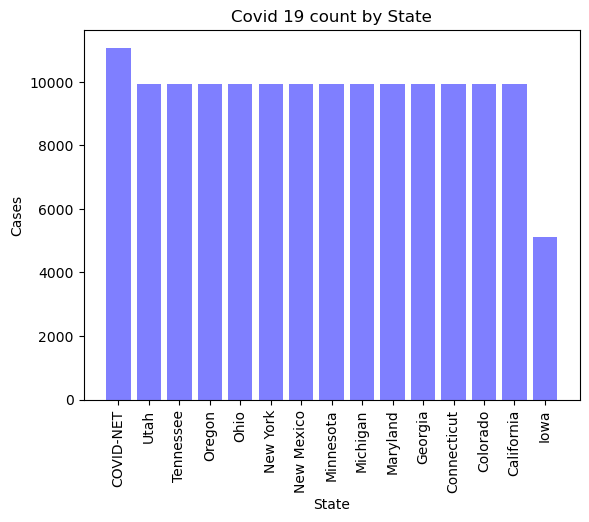

In [24]:
# Bar graph for State Vs Covid19 Count
plt.bar(state_count["State"], state_count["count"], color='b', alpha=0.5)
plt.xlabel('State')
plt.ylabel('Cases')
plt.title('Covid 19 count by State')
plt.xticks(rotation=90)
plt.show()

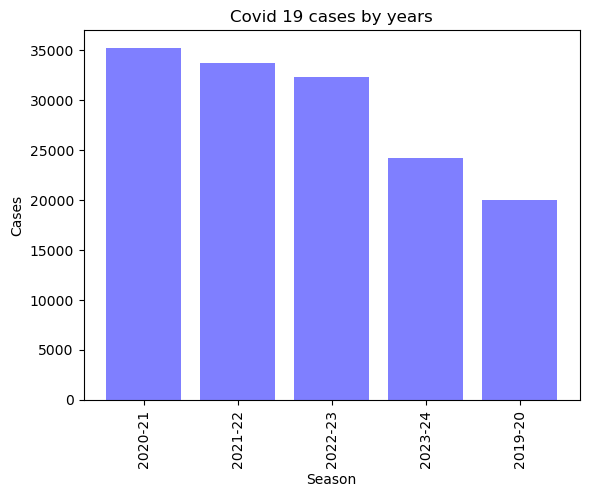

In [25]:
# Bar graph for Season Vs Covid19 cases 
season_data = pd.DataFrame(covid19_data["Season"].value_counts())
season_data = season_data.reset_index()
season_data.columns = ["Season", "Count"]

plt.bar(season_data["Season"], season_data["Count"], color='b', alpha=0.5)
plt.xlabel('Season')
plt.ylabel('Cases')
plt.title('Covid 19 cases by years')
plt.xticks(rotation=90)
plt.show()

In [61]:
# Bar graph for group age 

group_age = pd.DataFrame(covid19_data["Group_Age"].value_counts())
group_age=group_age.reset_index()
group_age.value_counts()

Group_Age        count
Adults           39360    1
All              27370    1
Children         59040    1
Middle_Aged      3280     1
Senior_Citizens  16400    1
Name: count, dtype: int64

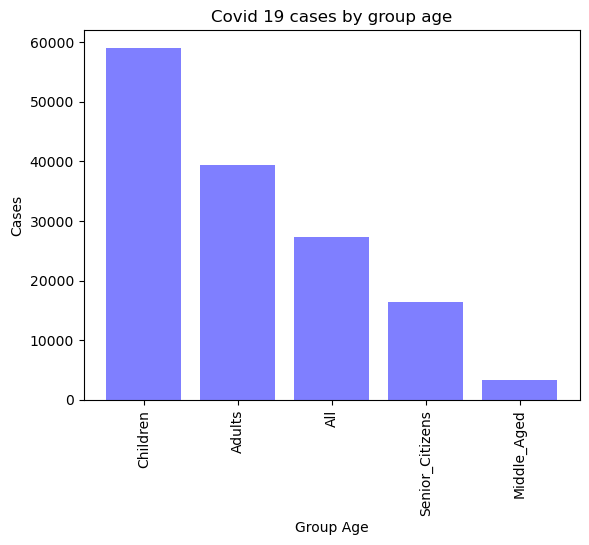

In [62]:
# Bar graph for Group Age Vs Covid19 cases 
plt.bar(group_age["Group_Age"],group_age["count"],color='b', alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('Group Age')
plt.ylabel('Cases')
plt.title('Covid 19 cases by group age')
plt.show()

In [35]:
# Pie chart for variable sex

sex_count = pd.DataFrame(covid19_data["Sex_Label"].value_counts())

sex_count=sex_count.reset_index()
sex_count

,Sex_Label,count
0,All,125770
1,Female,9840
2,Male,9840


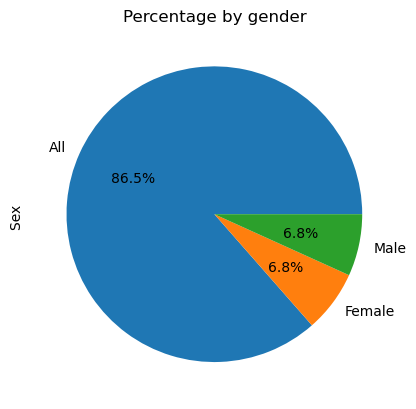

In [34]:
# Pie chart for gender
pd_gender = covid19_data["Sex_Label"].value_counts()
#pd_gender = sex_count["Sex_Label"].value_counts()

pd_gender.plot(kind="pie",autopct="%1.1f%%")
plt.ylabel("Sex ")
plt.title('Percentage by gender')
plt.show()

In [31]:
# Counting Races
covid19_data["Race_Label"].value_counts()

Race_Label
All                    95120
Hispanic               10066
A/PI, non-Hispanic     10066
AI/AN, non-Hispanic    10066
Black, non-Hispanic    10066
White, non-Hispanic    10066
Name: count, dtype: int64

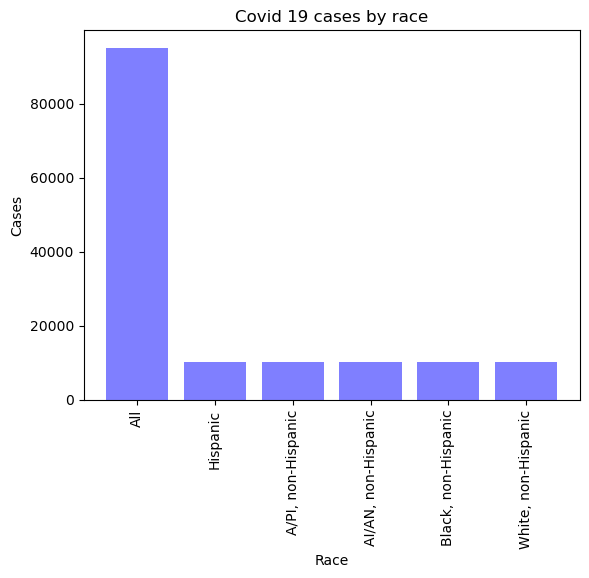

In [26]:
# Bar graph for Race label Vs Covid19 cases 


season_data=pd.DataFrame(covid19_data["Race_Label"].value_counts())

season_data=season_data.reset_index()
season_data

plt.bar(season_data["Race_Label"],season_data["count"],color='b', alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('Race')
plt.ylabel('Cases')
plt.title('Covid 19 cases by race')
plt.show()

In [42]:
# Counting Type
type_data=pd.DataFrame(covid19_data["Type"].value_counts())
type_data
type_data=type_data.reset_index()
type_data

,Type,count
0,Crude Rate,144320
1,Age adjusted Rate,1130


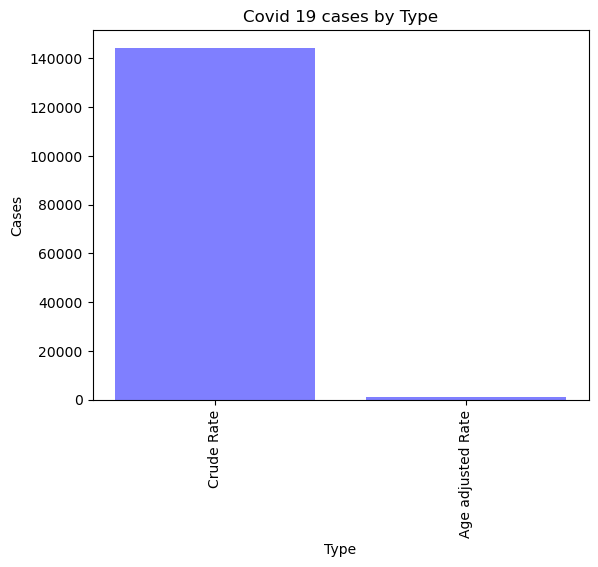

In [43]:
# Bar graph for Type Vs Covid19 cases 
# type_data=pd.DataFrame(covid19_data["Type"].value_counts())

plt.bar(type_data["Type"],type_data["count"],color='b', alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Cases')
plt.title('Covid 19 cases by Type')
plt.show()

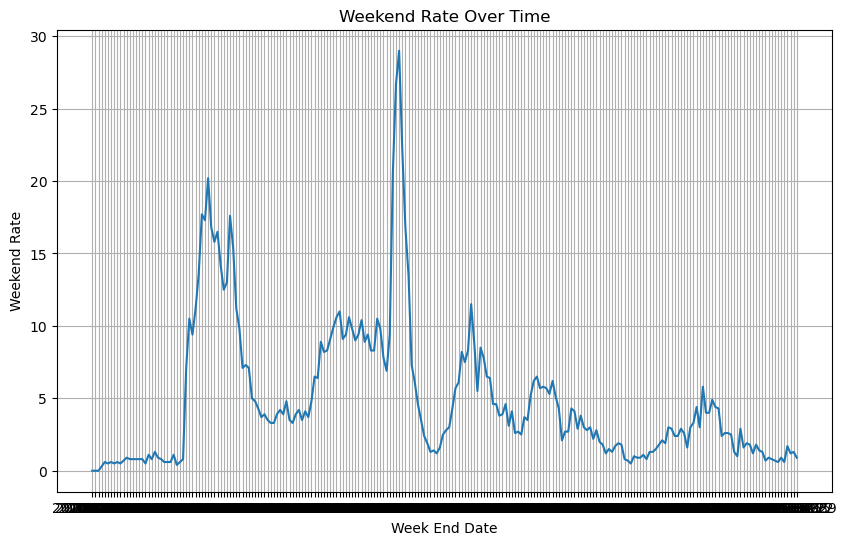

In [73]:
# Create a list of the years for the x-axis
weekend_data_s=covid19_data.drop_duplicates(subset=['_WeekendDate','Season'])
weekend_data_s = weekend_data_s.sort_values(by="_WeekendDate")


# Line graph for Weekend date vs WeeklyRate

plt.figure(figsize=(10, 6))
plt.plot(weekend_data_s["_WeekendDate"], weekend_data_s["WeeklyRate"])
#plt.xticks(rotation=90)
plt.xlabel('Week End Date')
plt.ylabel('Weekend Rate')
plt.title('Weekend Rate Over Time')
plt.grid(True)
plt.show()

## Quartiles, Outliers and Boxplots
### Section 2

In [45]:
# calculate the percentage of data excluded
a=covid19_data
print(len(a))
b=covid19_data.loc[covid19_data["CumulativeRate"] < 450]
print(len(b))

pert= (len(a)-len(b))/len(a)*100
print(pert)

145450
123572
15.041595049845307


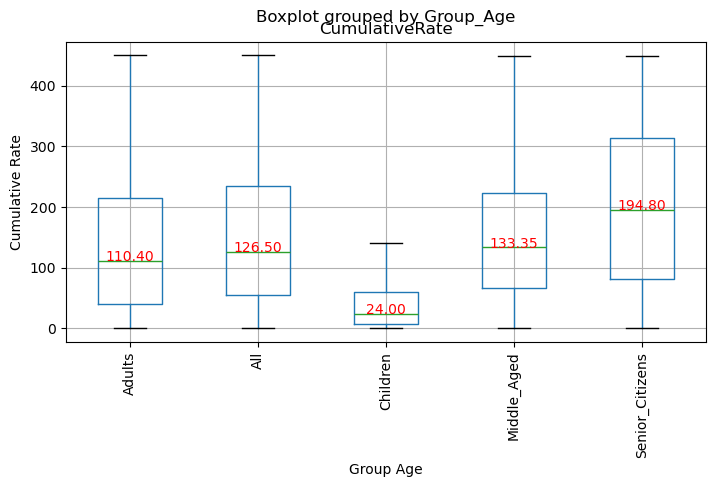

In [83]:
# Calculate the median values for each group age
median_values = covid19_data.loc[covid19_data["CumulativeRate"] < 450].groupby("Group_Age")["CumulativeRate"].median()

# Generate a box plot showing the Cumulative rate for each group age
ax1 = covid19_data.loc[covid19_data["CumulativeRate"] < 450].boxplot(column="CumulativeRate", by="Group_Age", showfliers=False, figsize=(8,4))
ax1.set_xlabel('Group Age')
ax1.set_ylabel('Cumulative Rate')

# Plot the median values on the box plot
for i, median_value in enumerate(median_values):
    ax1.text(i + 1, median_value, f"{median_value:.2f}", color='red', fontsize=10, ha='center')

plt.xticks(rotation=90)
plt.show()

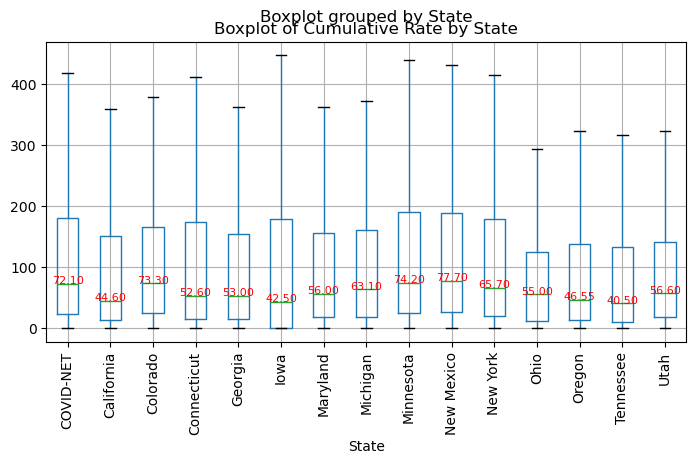

In [84]:
# Filter the data to exclude values above 450 in the "CumulativeRate" column
filtered_data = covid19_data[covid19_data["CumulativeRate"] < 450]

# Calculate the median cumulative rate by state
median_by_state = filtered_data.groupby("State")["CumulativeRate"].median()

# Display the boxplot
ax1 = filtered_data.boxplot(column="CumulativeRate", by="State",showfliers=False, figsize=(8,4))
plt.xticks(rotation=90)
plt.title("Boxplot of Cumulative Rate by State")

# Add median values as annotations on the box plot
for i, state in enumerate(median_by_state.index):
    y = median_by_state[state]
    ax1.annotate(f"{y:.2f}", xy=(i+1, y), color='red', fontsize=8, ha='center')

plt.show()

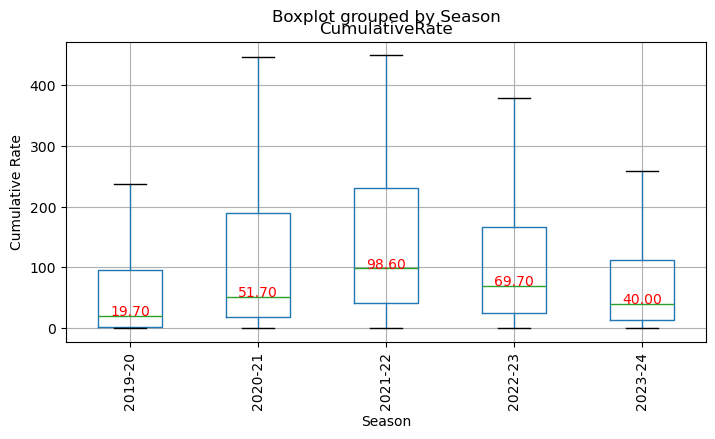

In [85]:

# Calculate the median values by season
median_values = covid19_data.loc[covid19_data["CumulativeRate"] < 450].groupby("Season")["CumulativeRate"].median()

# Generate a box plot showing the Cumulative rate by season
ax1 = covid19_data.loc[covid19_data["CumulativeRate"] < 450].boxplot(column="CumulativeRate", by="Season", showfliers=False, figsize=(8,4))
ax1.set_xlabel('Season')
ax1.set_ylabel('Cumulative Rate')

# Plot the median values on the box plot
for i, median_value in enumerate(median_values):
    ax1.text(i + 1, median_value, f"{median_value:.2f}", color='red', fontsize=10, ha='center')

plt.xticks(rotation=90)
plt.show()

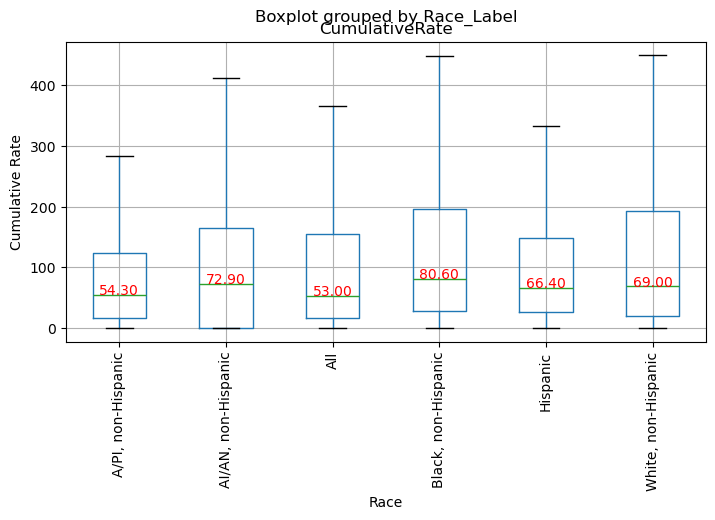

In [86]:

# Calculate the median values for each race
median_values = covid19_data.loc[covid19_data["CumulativeRate"] < 450].groupby("Race_Label")["CumulativeRate"].median()

# Generate a box plot showing the Cumulative rate by race
ax1 = covid19_data.loc[covid19_data["CumulativeRate"] < 450].boxplot(column="CumulativeRate", by="Race_Label", showfliers=False, figsize=(8,4))
ax1.set_xlabel('Race')
ax1.set_ylabel('Cumulative Rate')

# Plot the median values on the box plot
for i, median_value in enumerate(median_values):
    ax1.text(i + 1, median_value, f"{median_value:.2f}", color='red', fontsize=10, ha='center')

plt.xticks(rotation=90)
plt.show()

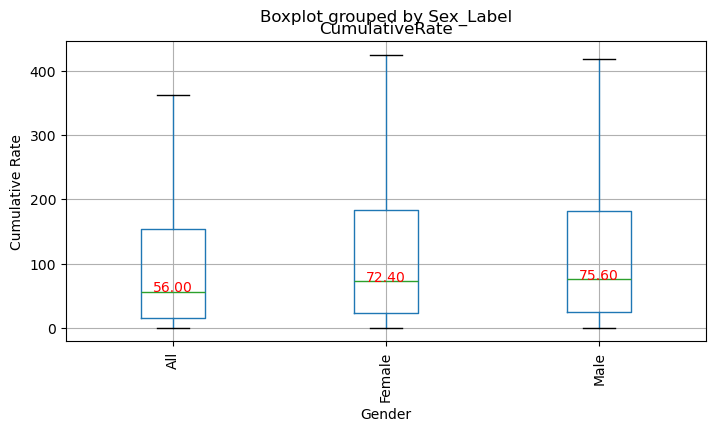

In [87]:

# Calculate the median values by gender
median_values = covid19_data.loc[covid19_data["CumulativeRate"] < 450].groupby("Sex_Label")["CumulativeRate"].median()

# Generate a box plot showing the Cumulative rate by Gender
ax1 = covid19_data.loc[covid19_data["CumulativeRate"] < 450].boxplot(column="CumulativeRate", by="Sex_Label", showfliers=False, figsize=(8,4))
ax1.set_xlabel('Gender')
ax1.set_ylabel('Cumulative Rate')

# Plot the median values on the box plot
for i, median_value in enumerate(median_values):
    ax1.text(i + 1, median_value, f"{median_value:.2f}", color='red', fontsize=10, ha='center')

plt.xticks(rotation=90)
plt.show()